<a href="https://colab.research.google.com/github/pinoke98/Artificial_Intelligence/blob/main/AlgoritmosEvolutivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
#@title Introducir la cantidad de productos (N) y el preso max permitido en la mochila (W)
N =  10#@param {type:"integer"}
W =  50#@param {type:"integer"}

In [ ]:
#@title Rango de Precios
MinPrecio =  1#@param {type:"number"}
MaxPrecio =  100#@param {type:"number"}


In [ ]:
weights = W*np.random.random_sample((N,))
weights

array([15.04923379, 36.30654658, 15.89276564, 34.91136209, 46.65484352,
       30.01277359, 26.10131678, 17.55918625, 31.54590606, 42.73097147])

In [ ]:
precios = (MaxPrecio-MinPrecio)*np.random.random_sample((N,)) + MinPrecio
precios

array([96.58697522, 13.85433505,  6.00533415, 20.80036417, 10.54616226,
       56.97884885, 96.24722117, 29.33518939, 63.53618296, 99.11114986])

##Generar Poblacion

In [ ]:
#@title Introducir el Tamaño de la Poblacion (NP)
Np = 30 #@param {type:"integer"}


In [ ]:
population = [np.random.randint(0,2,N) for i in range(Np)]
population

[array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1]),
 array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0]),


In [ ]:
def generateFirstPopulation(N,Np):
  population = [np.random.randint(0,2,N) for _ in range(Np)]
  return population

In [ ]:
def fitnessFunct(x):
  return sum(x*precios)

In [ ]:
def valid(x):
  print(x)
  return 0<sum(x*weights)<=W

###Ejemplo


In [ ]:
print(precios)
print(population[0])
print(fitnessFunct(population[0]))
print(population[0]*weights)
print(valid(population[0]))

[96.58697522 13.85433505  6.00533415 20.80036417 10.54616226 56.97884885
 96.24722117 29.33518939 63.53618296 99.11114986]
[0 0 0 0 0 1 0 1 0 0]
86.31403823475006
[ 0.          0.          0.          0.          0.         30.01277359
  0.         17.55918625  0.          0.        ]
True


##Generar la poblacion desde un inicio con individuos validos

In [ ]:
def fitnessFunct(x):
  return 0.1 if not valid(x) else sum(x*precios)

In [ ]:
def generateFirstPopulation(N,Np):
  population = []
  while len(population)<Np:
    aux = np.random.randint(0,2,N)
    if valid(aux):
      population.append(aux)
  return population

In [ ]:
generateFirstPopulation(N,Np)


[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),


##Pasos de Evolucion

**Seleccion:** Ruleta

**Cruce:** Cruce de un punto

**Mutacion:** Mutacion de un punto


##Seleccion: Metodo de la Ruleta

In [ ]:
population = generateFirstPopulation(N,Np)

In [ ]:
sorted_population = sorted(population, key = fitnessFunct, reverse = True)
sp = sorted_population[0:5]
sp

[array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0])]

In [ ]:
ff = [fitnessFunct(i) for i in sp]
ff

[192.83419638561313,
 192.83419638561313,
 192.83419638561313,
 160.12315817828983,
 160.12315817828983]

In [ ]:
probability = np.array(ff)/sum(ff)
probability

array([0.21455848, 0.21455848, 0.21455848, 0.17816228, 0.17816228])

In [ ]:
accumulatedProb = np.cumsum(probability)
accumulatedProb

array([0.21455848, 0.42911695, 0.64367543, 0.82183772, 1.        ])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(list(zip(sp,ff,probability,accumulatedProb)), columns = ['Individuo','F_Calidad','Probabilidad','Prob_Acum'])
df

,Individuo,F_Calidad,Probabilidad,Prob_Acum
0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",192.834196,0.214558,0.214558
1,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",192.834196,0.214558,0.429117
2,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]",192.834196,0.214558,0.643675
3,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]",160.123158,0.178162,0.821838
4,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]",160.123158,0.178162,1.000000


In [ ]:
import matplotlib.pyplot as plt


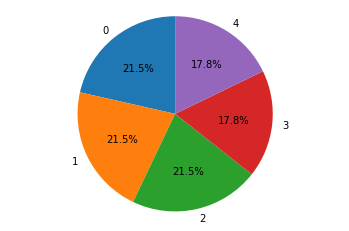

In [ ]:
labels = np.arange(len(probability))

fig1,ax1 = plt.subplots()
ax1.pie(probability, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.show()

In [ ]:
def roulette(population):
  ff = [fitnessFunct(i) for i in population]
  probability = np.array(ff)/sum(ff)
  accumulatedProb = np.cumsum(probability)
  return accumulatedProb

In [ ]:
accumulatedProb = roulette(population)

In [ ]:
def selection(population):
  probAcum = roulette(population)
  aleatorio = np.random.uniform(0,1)
  ind = 0
  for i in range(len(probAcum)):
    if i == 0 and aleatorio < probAcum[i]:
      ind = population[i]
    elif aleatorio >= probAcum[i-1] and aleatorio < probAcum[i]:
      ind = population[i]
  return ind
  

In [ ]:
def cruce(population, probCruce):
  p1 = selection(population)
  p2 = selection(population)
  cruce = np.random.uniform(0,1)
  if cruce > probCruce:
    return [p1,p2]
  ptomedio = np.random.randint(1,N-1)
  h1 = p1[0:ptomedio]
  for i in range(ptomedio,N):
    np.append(h1,p2[i])
  h2 = p2[0:ptomedio]
  for i in range(ptomedio,N):
    np.append(h2,p1[i])
  
  return [h1,h2] if valid(h1) and valid(h2) else [h1,p2] if valid(h1) and not valid(h2) else [p1,h1] if valid(h2) and not valid(h1) else [p1,p2]


In [ ]:
def mutacion(population, probMutacion):
  p = selection(population)
  mutacion = np.random.uniform(0,1)
  if mutacion>probMutacion:
    return p
  padre = p
  index = np.random.randint(0,N)
  p[index] = 1-p[index]
  return p if valid(p) else mutacion(population, probMutacion)

In [ ]:
def calidad(ind):
  if valid(ind):
    return sum(ind*precios)
  return 0.1

In [ ]:
def algEvolutivo(N,Np,cantidadGeneraciones, limiteCalidad,probMutacion,probCruce):
  population = generateFirstPopulation(N,Np)
  best = np.zeros(N)
  #print(best)
  for i in range(cantidadGeneraciones):
    population = sorted(population, key=calidad, reverse=True)
    if calidad(population[0])>=limiteCalidad:
      break
    if calidad(best)<calidad(population[0]):
      best = population[0]
    newGeneration = []
    while len(newGeneration)<Np:
      crucep = cruce(population,probCruce)
      for i in crucep:
        if len(newGeneration)<Np:
          newGeneration.append(i)
      if len(newGeneration)<Np:
        newGeneration.append(mutacion(population,probMutacion))
    population = newGeneration
  population = sorted(population,key = calidad,reverse=True)
  return population